# PV-Anlagen und Batteriespeicher Analyse

## Beschreibung

Dieses Jupyter Notebook führt eine umfassende Analyse von Photovoltaik-Anlagen mit Batteriespeicher durch. Es simuliert verschiedene Konfigurationen für ein Gebäude in Waiblingen (Koordinaten: 48.865, 9.314) mit zwei unterschiedlich ausgerichteten Dachflächen.

## Eingabeparameter

- **Standort**: Latitude/Longitude: 48.865, 9.314 (Burghaldenstr. 5, 71336 Waiblingen)
- **Dachneigung zur Straße**: 48°, Bearing: 285° (WNW), Azimuth für PVGIS: +105°
- **Dachneigung zum Garten**: 42°, Bearing: 105° (OSO), Azimuth für PVGIS: -75°

## Hauptfunktionen

### 1. PV-Batterie Grundsimulation
- Simuliert eine PV-Anlage mit Batteriespeicher über den Zeitraum 2005-2023
- Berücksichtigt reale Wetterdaten von PVGIS und Verbrauchsprofile
- Analysiert zwei Dachausrichtungen (Ost-Südost und West-Nordwest)
- Zeigt monatliche PV-Energieerzeugung vs. nicht genutzte PV-Energie
- Visualisiert Batteriezustände (volle vs. leere Tage pro Monat)

### 2. Batteriekapazitäts-Optimierung
- Untersucht den Einfluss verschiedener Batteriekapazitäten (0-80 kWh)
- Zeigt die Beziehung zwischen Batteriegröße und genutzter PV-Energie
- Hilft bei der Bestimmung der optimalen Batteriegröße für maximalen Eigenverbrauch

### 3. Ost-West Ausrichtungs-Optimierung
- Analysiert die optimale Verteilung der PV-Module zwischen Ost- und Westdach
- Untersucht verschiedene Verteilungen bei konstanter Gesamtleistung (50 kWp)
- Bestimmt die beste Aufteilung für maximalen PV-Eigenverbrauch

## Verwendungszwecke

- **Anlagenplanung**: Optimierung der Modulverteilung und Batteriegröße
- **Wirtschaftlichkeitsanalyse**: Bestimmung des optimalen Kosten-Nutzen-Verhältnisses
- **Eigenverbrauchsoptimierung**: Maximierung des selbst genutzten Solarstroms
- **Autarkieanalyse**: Bewertung der Netzunabhängigkeit bei verschiedenen Konfigurationen
- **Investitionsentscheidung**: Datenbasierte Grundlage für PV- und Speicherinvestitionen

## Datenquellen

- **Verbrauchsdaten**: [Open Power System Data - Household Data](https://data.open-power-system-data.org/household_data/)
- **PV-Ertragsdaten**: [PVGIS Hourly API](https://re.jrc.ec.europa.eu/pvg_tools/en/#api_5.3)
- **Referenzwerte**: [DeStatis - Stromverbrauch Haushalte](https://www.destatis.de/DE/Themen/Gesellschaft-Umwelt/Umwelt/UGR/private-haushalte/Tabellen/stromverbrauch-haushalte.html)

## Besondere Hinweise

**Negative "PV Energy Not Used" Werte**: Wenn die Grafik negative Werte für nicht genutzte PV-Energie zeigt, bedeutet dies, dass in diesem Monat mehr PV-Energie verbraucht wurde als produziert. Dies geschieht durch Batterieentladung von in vorherigen Monaten gespeicherter Energie (typisch im Winter bei Nutzung der im Sommer gespeicherten Energie).

Das Notebook nutzt realitätsnahe Simulationen basierend auf historischen Wetter- und Verbrauchsdaten für fundierte Planungsentscheidungen.



Annahmen:
- Latitude/Longitude: 48.865, 9.314 (Burghaldenstr. 5, 71336 Waiblingen)
- Dachneigung zur Straße: 48º, Bearing: 285º (WNW), Azimuth for PVGIS: +105º
- Dachneigung zum Garten: 42º, Bearing: 105º (OSO), Azimuth for PVGIS: -75º

Quellen:
- [Stromverbrauch Haushalt - DeStatis](https://www.destatis.de/DE/Themen/Gesellschaft-Umwelt/Umwelt/UGR/private-haushalte/Tabellen/stromverbrauch-haushalte.html) - Gesamtstromverbrauch pro Jahr
- [PVGis Hourly](https://re.jrc.ec.europa.eu/pvg_tools/en/#api_5.3) - Berechnungstool für Sonneneinstrahlung
- [Sample data](https://data.open-power-system-data.org/household_data/) - Messdaten zu Stromverbrauch aus EU-gefördertem Projekt

In [4]:
import battery_simulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

EINGABEPARAMETER:
Verbrauch pro Wohnung pro Jahr: 3200 kWh
Installierte Leistung OSO: 15.0 kWp
Installierte Leistung WNW: 12.0 kWp
Batteriekapazität: 19.5 kWh
Batterie-Entladegrenze: 10%
Batterie-Ladewirkungsgrad: 90%
Maximale Batterieleistung: 4.5 kW

SIMULATIONSERGEBNISSE:
------------------------------------------------------------
Durchschnittliche jährliche genutzte PV-Energie: 10927.65 kWh
Verbrauch: 15973.71 kWh
Durchschnittliche Netzunabhängigkeitsrate: 68.4%
Durchschnittliche PV-Eigenverbrauchsrate: 48.2%



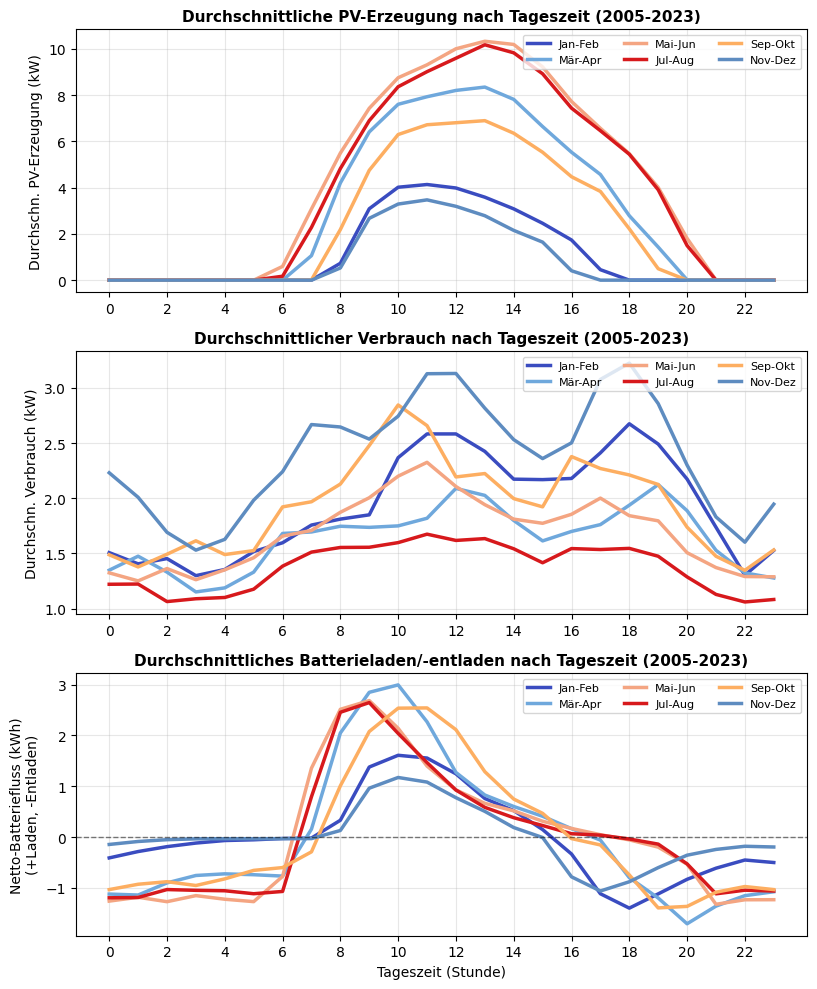

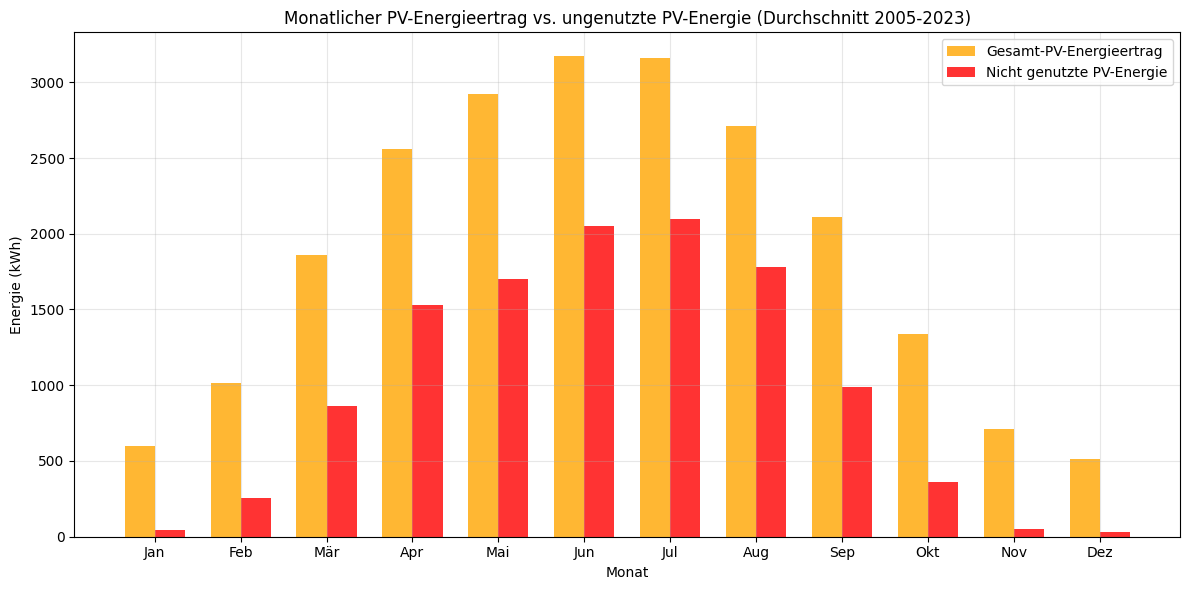

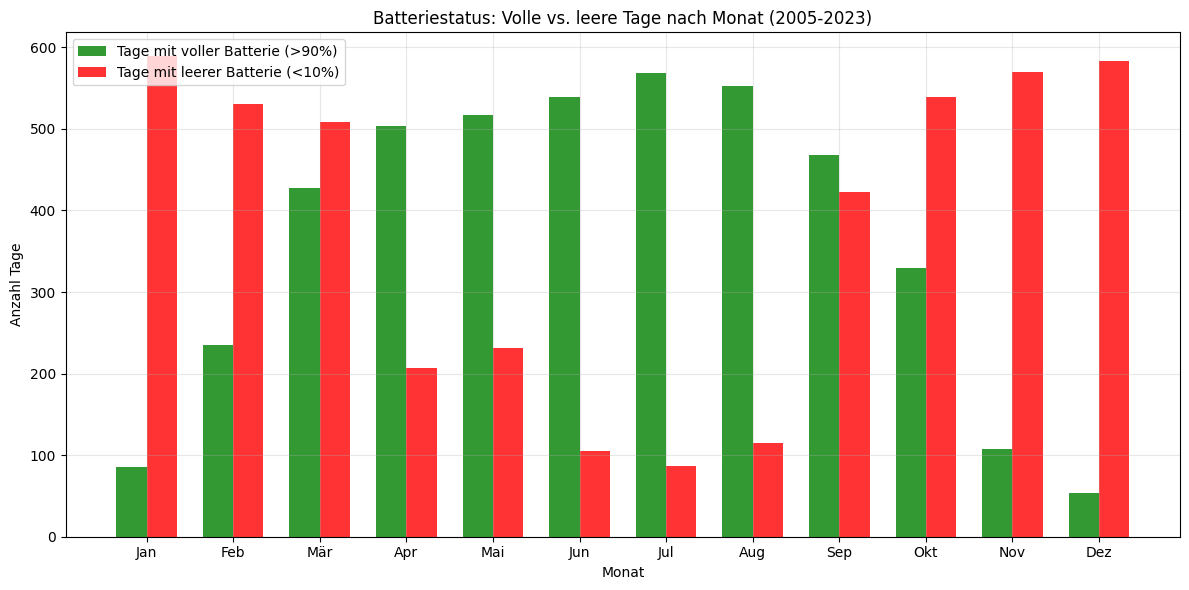

PDF-Bericht erfolgreich erstellt: PV_Batterie_Simulation_20251024_115407.pdf


In [5]:
battery_simulation.run_pv_battery_simulation(
    consumption_per_flat_per_year_kWh = 3200,  # kWh
    installed_power_oso_kWp = 15,  # kWp
    installed_power_wnw_kWp = 12,  # kWp
    battery_capacity_kWh = 19.5,  # kWh, available: 6.5, 9.75, 13, 16.25, 19.5
    battery_discharge_cutoff_limit = 0.1,  # 10% minimum charge
    battery_charge_efficiency = 0.9,  # 90% efficiency when charging/discharging
    battery_max_power_kW=4.5,  # 4.5 kW max power of battery
)

# Battery Size

Installed power: 5+2=7 kWp
Battery capacity: 0 kWh, Average annual PV power used: 4364.22 kWh
Battery capacity: 6.5 kWh, Average annual PV power used: 5305.61 kWh
Battery capacity: 9.75 kWh, Average annual PV power used: 5558.95 kWh
Battery capacity: 13 kWh, Average annual PV power used: 5713.06 kWh
Battery capacity: 16.25 kWh, Average annual PV power used: 5789.73 kWh
Battery capacity: 19.5 kWh, Average annual PV power used: 5830.02 kWh
Number of modules: 15, initial cost: 10725 for modules + 3057 Mieterstrom = 13812 EUR
Installed power: 7+3=10 kWp
Battery capacity: 0 kWh, Average annual PV power used: 5123.67 kWh
Battery capacity: 6.5 kWh, Average annual PV power used: 6385.88 kWh
Battery capacity: 9.75 kWh, Average annual PV power used: 6825.89 kWh
Battery capacity: 13 kWh, Average annual PV power used: 7163.95 kWh
Battery capacity: 16.25 kWh, Average annual PV power used: 7393.81 kWh
Battery capacity: 19.5 kWh, Average annual PV power used: 7532.03 kWh
Number of modules: 21, initia

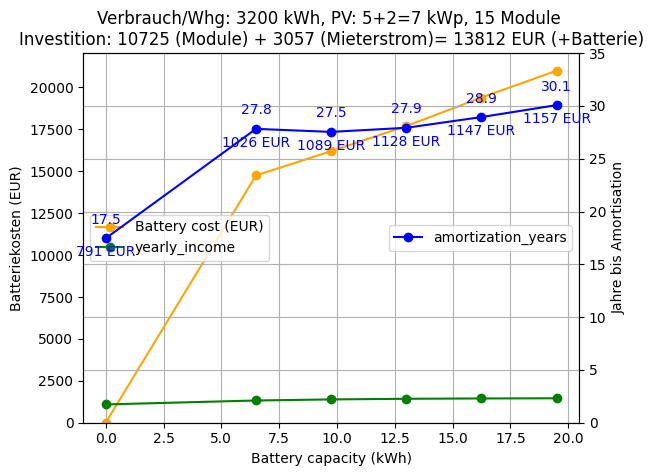

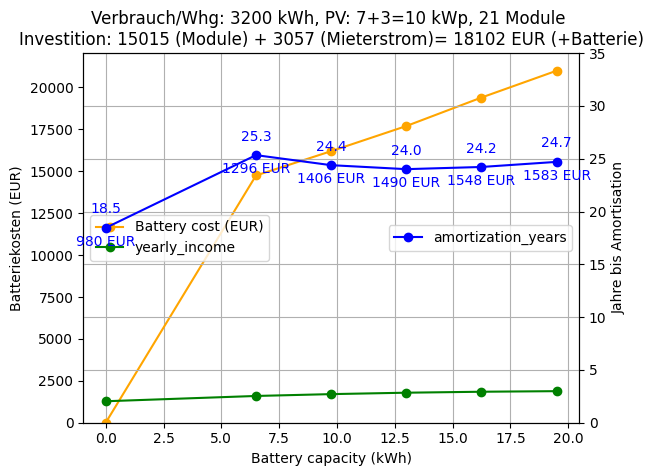

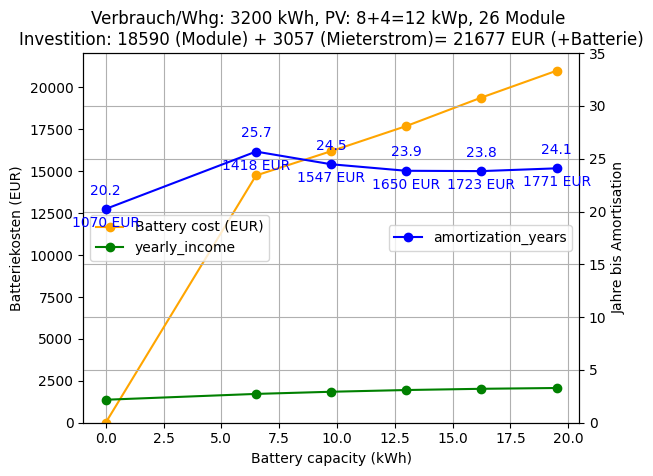

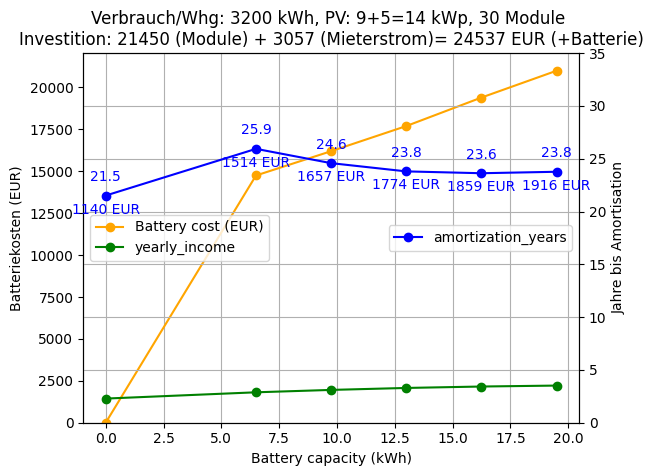

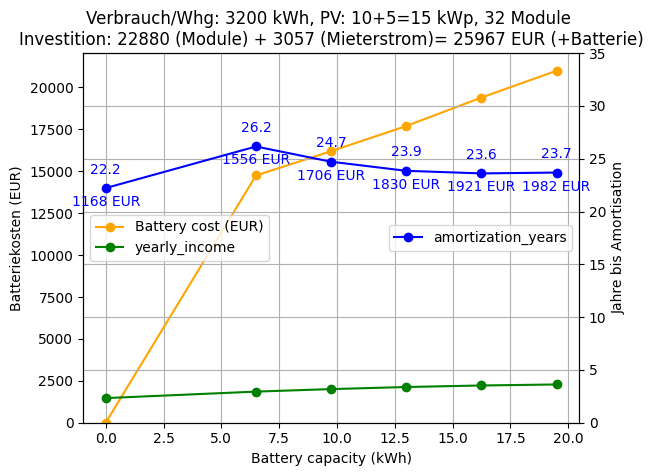

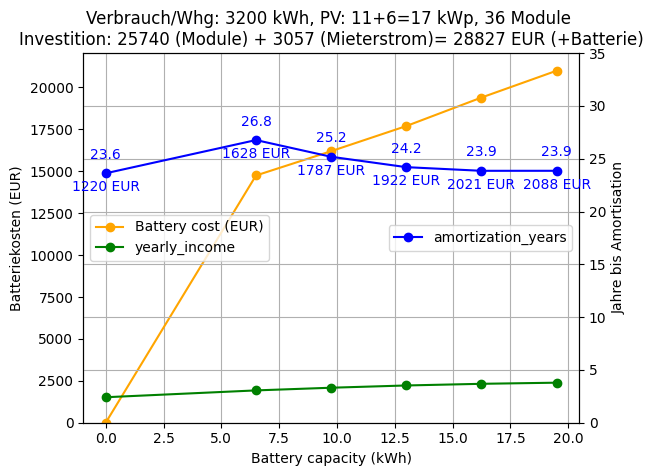

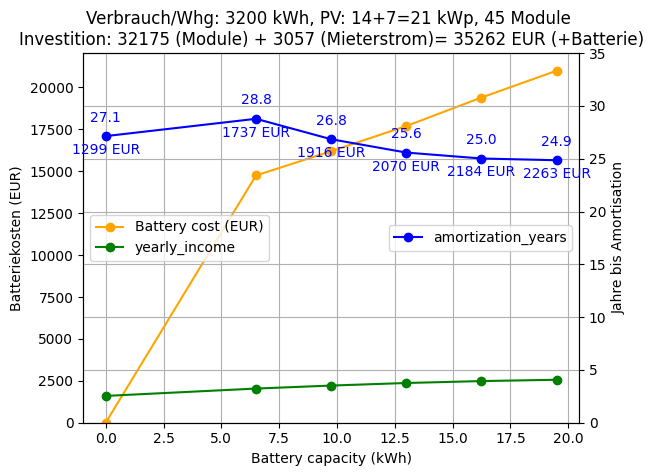

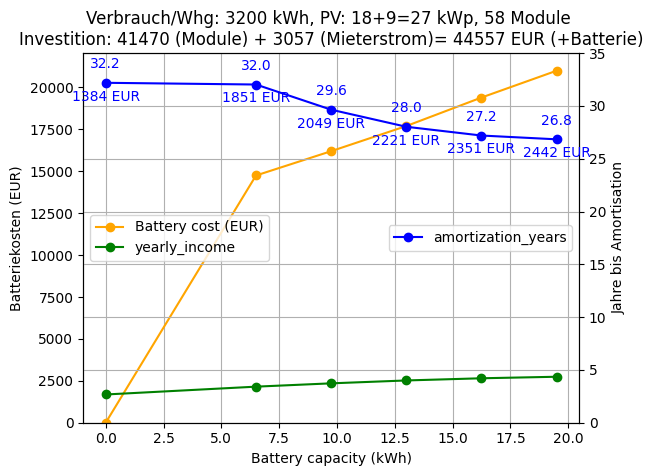

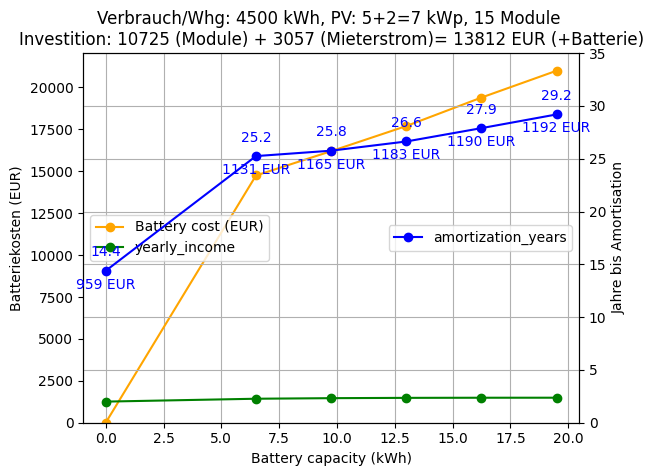

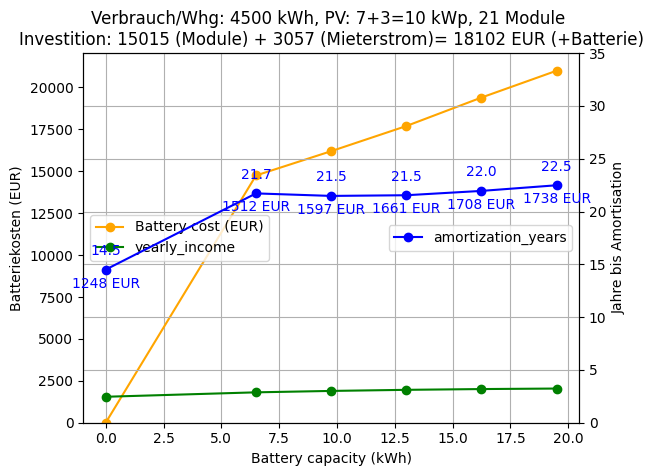

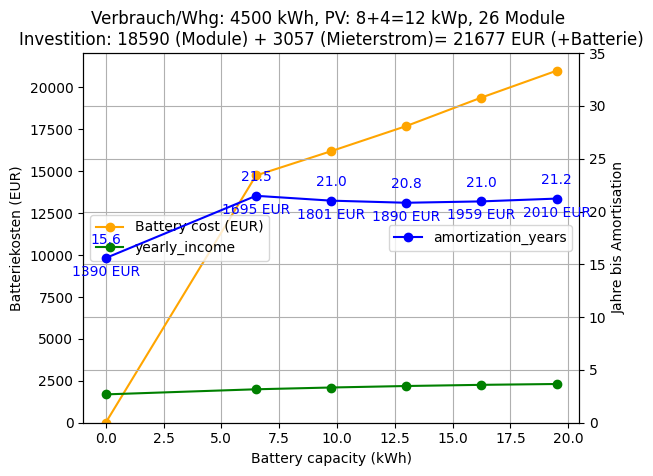

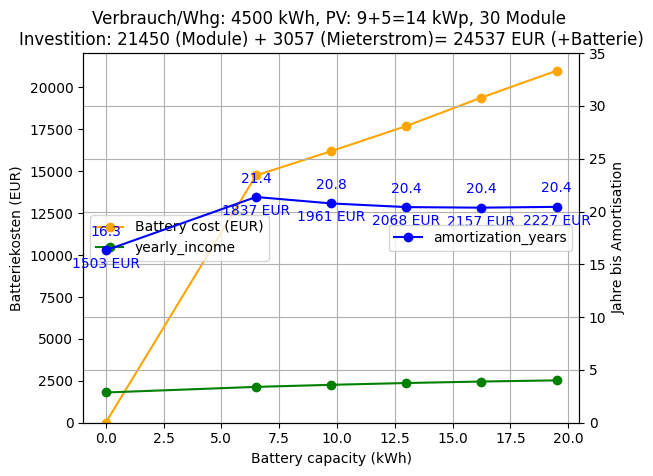

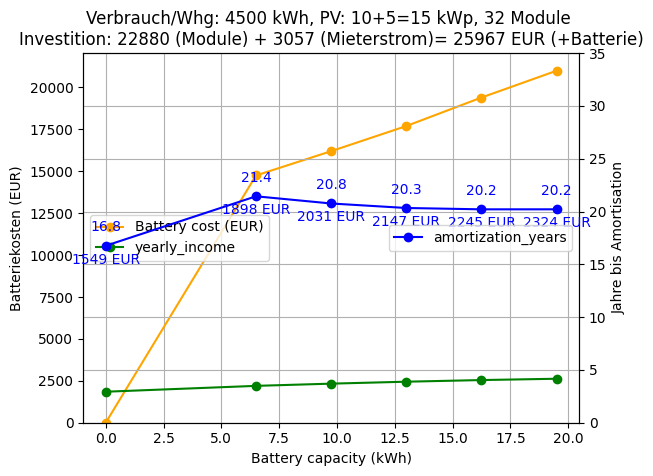

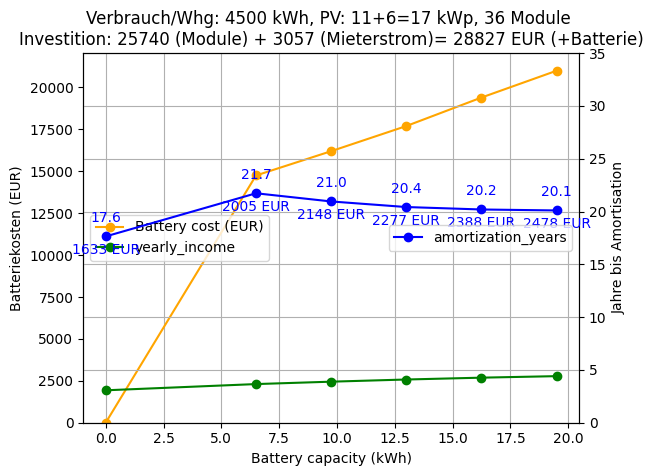

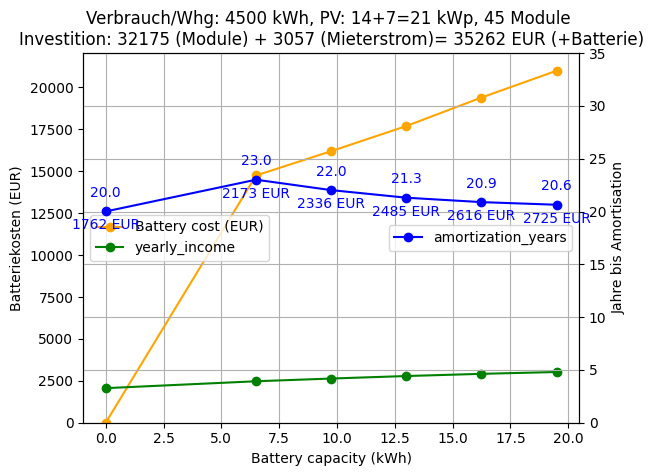

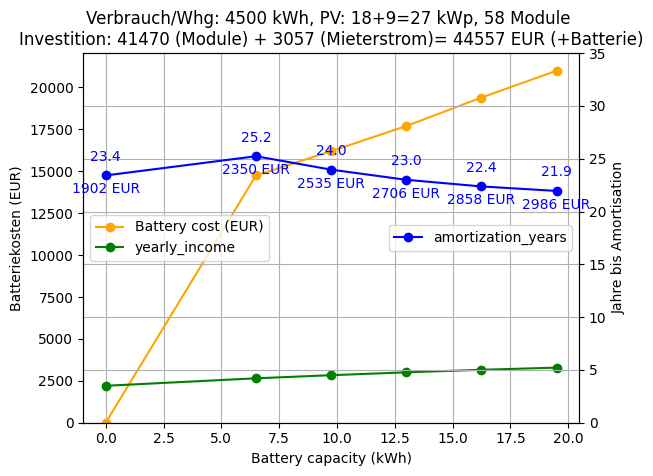

In [6]:
installed_power_oso_kWp = 7  # kWp
installed_power_wnw_kWp = 4  # kWp
consumption_per_flat_per_year_kWh = 4500 # kWh


for consumption_per_flat_per_year_kWh in [3200, 4500]:
    for (installed_power_oso_kWp, installed_power_wnw_kWp) in [(5,2), (7,3), (8,4), (9,5), (10,5), (11,6), (14, 7), (18, 9)]:
        print(f"======================\nInstalled power: {installed_power_oso_kWp}+{installed_power_wnw_kWp}={installed_power_oso_kWp+installed_power_wnw_kWp} kWp")

        results = []
        costs = []
        for battery_capacity_kWh in [0, 6.5, 9.75, 13, 16.25, 19.5]: #, 25, 30, 35]:
            avg_pv_used = battery_simulation.run_pv_battery_simulation(
                consumption_per_flat_per_year_kWh = consumption_per_flat_per_year_kWh,  # kWh
                installed_power_oso_kWp = installed_power_oso_kWp,  # kWp
                installed_power_wnw_kWp = installed_power_wnw_kWp,  # kWp
                battery_capacity_kWh = battery_capacity_kWh,  # kWh, available: 6.5, 9.75, 13, 16.25, 19.5
                battery_discharge_cutoff_limit = 0.1,  # 10% minimum charge
                battery_charge_efficiency = 0.9,  # 90% efficiency when charging/discharging
                battery_max_power_kW=4.5,  # 4.5 kW max power of battery
                enable_plots=False
            )

            battery_costs = {
                0: 0,
                6.5: 14750,
                9.75: 16200,
                13: 17700,
                16.25: 19400,
                19.5: 21000,
            }
            battery_cost = battery_costs.get(battery_capacity_kWh, np.nan)

            if not np.isnan(battery_cost):
                costs.append((battery_capacity_kWh, battery_cost, avg_pv_used))

            print(f"Battery capacity: {battery_capacity_kWh} kWh, Average annual PV power used: {avg_pv_used:.2f} kWh")
            results.append((battery_capacity_kWh, avg_pv_used))

        df_result = pd.DataFrame(results, columns=["Battery capacity (kWh)", "Average annual PV power used (kWh)"])
        df_result.set_index("Battery capacity (kWh)", inplace=True)

        df_costs = pd.DataFrame(costs, columns=["Battery capacity (kWh)", "Battery cost (EUR)", "Average annual PV power used (kWh)"])
        df_costs.set_index("Battery capacity (kWh)", inplace=True)

        number_of_modules = int((installed_power_oso_kWp+installed_power_wnw_kWp)/.46)
        initial_cost = 715*number_of_modules + 3087
        # Running costs mieterstrom 1.440 EUR / 3 years = 480 EUR/year
        # Grundpreis für Mieter: 15 EUR / month = 180 EUR / year
        # Arbeitspreis: 0.25 EUR / kWh
        print(f"Number of modules: {number_of_modules}, initial cost: {715*number_of_modules} for modules + 3057 Mieterstrom = {initial_cost} EUR")
        df_costs["yearly_income"] = df_costs["Average annual PV power used (kWh)"] * 0.25  # EUR per kWh
        df_costs["amortization_years"] = (df_costs["Battery cost (EUR)"] + initial_cost) / (df_costs["yearly_income"] - 480 + 180)

        df_costs.plot(y="Battery cost (EUR)", marker='o', color='orange')
        df_costs.plot(y="yearly_income", marker='o', color='green', ax=plt.gca())
        plt.title(f"Verbrauch/Whg: {consumption_per_flat_per_year_kWh} kWh, PV: {installed_power_oso_kWp}+{installed_power_wnw_kWp}={installed_power_oso_kWp+installed_power_wnw_kWp} kWp, {number_of_modules} Module \n"\
                +f"Investition: {715*number_of_modules} (Module) + 3057 (Mieterstrom)= {initial_cost} EUR (+Batterie)")
        plt.ylim(0, None)
        plt.ylabel("Batteriekosten (EUR)")
        plt.legend(loc='center left')
        plt.grid(which='both', axis='x')
        plt.twinx()
        df_costs.plot(y="amortization_years", marker='o', color='blue', ax=plt.gca())
        for x, y in df_costs["amortization_years"].items():
            plt.text(x, y - 1.7, f"{y:.1f}\n\n{int(df_costs.loc[x,'yearly_income'] - 480 + 180)} EUR", ha='center', color='blue')
        plt.ylim(0, 35)
        plt.legend(loc='center right')
        plt.ylabel("Jahre bis Amortisation");
        plt.grid()
        plt.savefig(f"battery_costs_amortization_{consumption_per_flat_per_year_kWh}_{number_of_modules}.png")


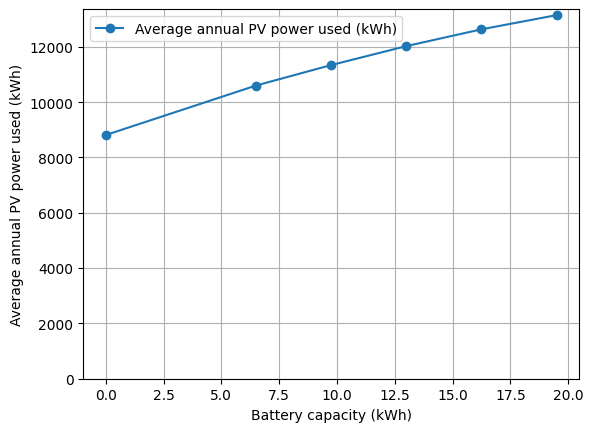

In [7]:
df_result.plot(marker='o')
plt.ylim(0, None)
plt.ylabel("Average annual PV power used (kWh)")
plt.grid()

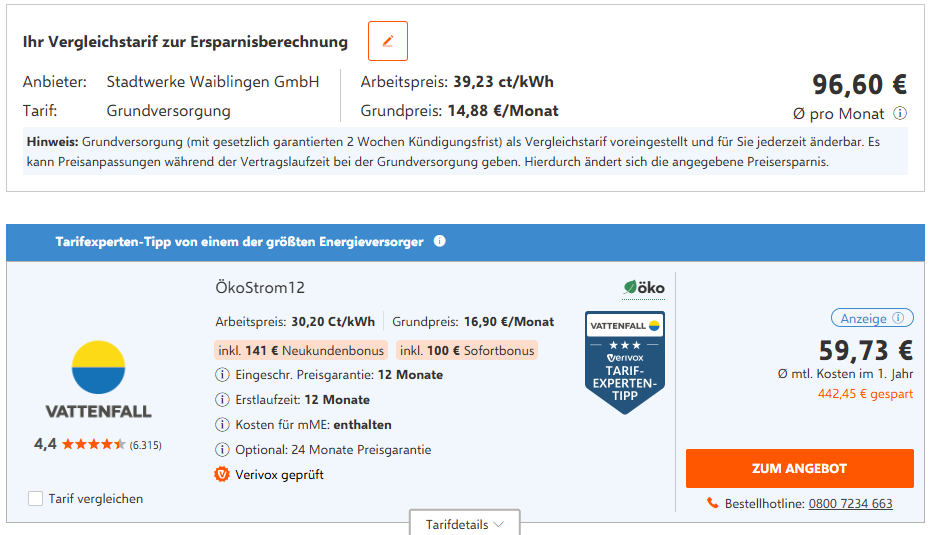

# Placement East/West

In [8]:
kwp_total = 15  # kWp
results = []
for kwp_east in np.arange(0, kwp_total + 1, 1):
    kwp_west = kwp_total - kwp_east
    avg_pv_used = battery_simulation.run_pv_battery_simulation(
        consumption_per_flat_per_year_kWh = 3200,  # kWh
        installed_power_oso_kWp = kwp_east,  # kWp
        installed_power_wnw_kWp = kwp_west,  # kWp
        battery_capacity_kWh = 10,  # kWh
        battery_discharge_cutoff_limit = 0.1,  # 10% minimum charge
        battery_charge_efficiency = 0.95,  # 95% efficiency when charging
        enable_plots=False
    )
    print(f"Installed power East: {kwp_east} kWp, West: {kwp_west} kWp, Average annual PV power used: {avg_pv_used:.2f} kWh")
    results.append((kwp_east, avg_pv_used))

df_result = pd.DataFrame(results, columns=["Installed power East (kWp)", "Average annual PV power used (kWh)"])
df_result.set_index("Installed power East (kWp)", inplace=True)

Installed power East: 0 kWp, West: 15 kWp, Average annual PV power used: 7094.95 kWh
Installed power East: 1 kWp, West: 14 kWp, Average annual PV power used: 7351.04 kWh
Installed power East: 2 kWp, West: 13 kWp, Average annual PV power used: 7539.40 kWh
Installed power East: 3 kWp, West: 12 kWp, Average annual PV power used: 7681.89 kWh
Installed power East: 4 kWp, West: 11 kWp, Average annual PV power used: 7788.21 kWh
Installed power East: 5 kWp, West: 10 kWp, Average annual PV power used: 7870.29 kWh
Installed power East: 6 kWp, West: 9 kWp, Average annual PV power used: 7937.69 kWh
Installed power East: 7 kWp, West: 8 kWp, Average annual PV power used: 7992.86 kWh
Installed power East: 8 kWp, West: 7 kWp, Average annual PV power used: 8036.17 kWh
Installed power East: 9 kWp, West: 6 kWp, Average annual PV power used: 8068.07 kWh
Installed power East: 10 kWp, West: 5 kWp, Average annual PV power used: 8088.46 kWh
Installed power East: 11 kWp, West: 4 kWp, Average annual PV power us

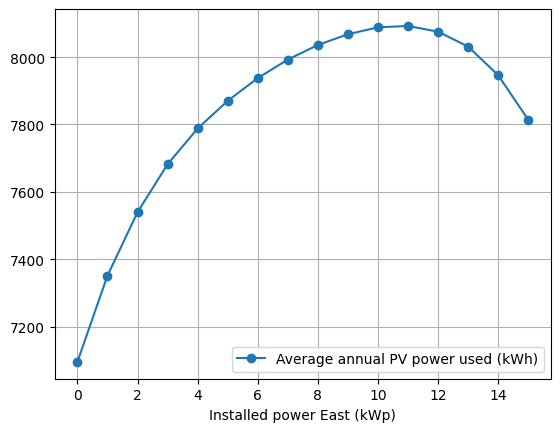

In [9]:
df_result.plot(y="Average annual PV power used (kWh)", marker='o')
#plt.ylim(0, None)
plt.grid()